In [1]:
# Import 3rd party packages

using DifferentialEquations, StochasticDiffEq, LinearAlgebra, Calculus, Discretizers, KernelDensity, Distributions
using JLD2, FileIO, DataFrames, LaTeXStrings;
using DelimitedFiles,CSV, Query;
using Plots;

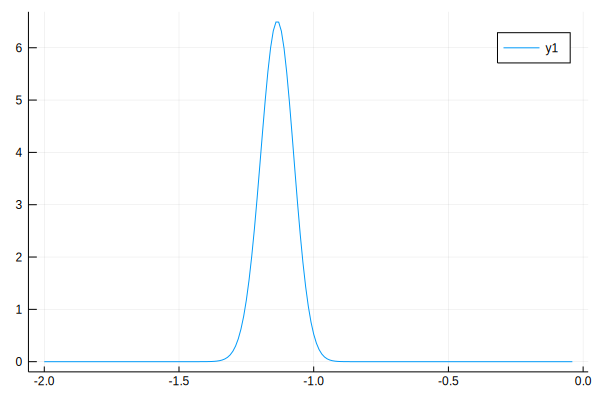

In [2]:
#####################################################################
# MULTIPLICATIVE NOISE EXAMPLE: STEADY STATE PROBABILITY DISTRIBUTION
#####################################################################

####################################
# f_1:
# stable stat: x=-1.14168; x=1.24240
# saddle: x=-0.100715
####################################

# The parameters governing function_1
a1=0.7
b1=0.0
c1=1.0
d1=0.1

# CHANGE NOISE PARAMETER HERE
α=0.1

# Steady state probability distribution as calculated in pdf
# Add abs to x so we don't have negative log values
f1_ssd(x) = exp((-2log(abs(x))) - ((a1*x^2)/(α^2)) + ((2*b1*x)/(α^2)) + ((2*c1*log(abs(x)))/α^2) - ((2*d1)/(α^2*x)))
# exclude x=[-.03:0.0] as solution fails here
# collect both negative and positive values for where the solution exists
x_neg = collect(-2.0:0.01:-0.04)
x_pos = collect(0.01:0.01:2.0)

f1_neg = f1_ssd.(x_neg)
f1_pos = f1_ssd.(x_pos)

f1_neg = f1_neg./(0.01*sum(f1_neg)) 
f1_pos = f1_pos./(0.01*sum(f1_pos))

# Negative side of steady state prob dist
p1_neg = plot(x_neg,f1_neg)

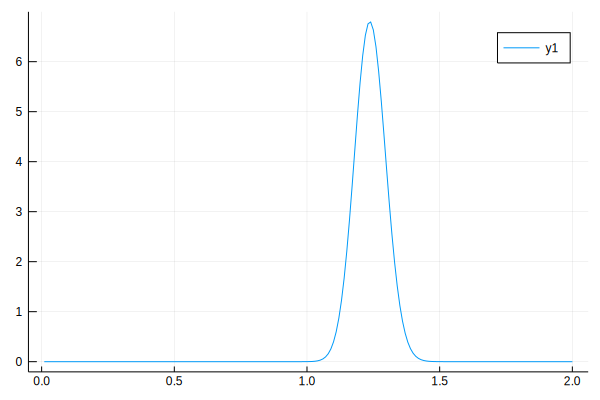

In [3]:
# positive side of steady state prob dist
p1_pos = plot(x_pos,f1_pos)

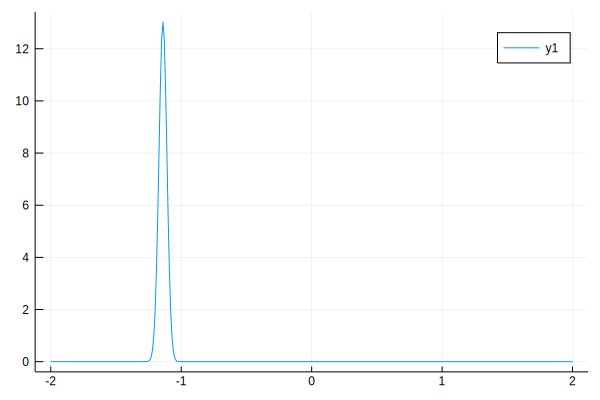

In [4]:
# Now I write some rubbish code to attempt to plot the distributions on the same plot and suddenly, with the same
# level of noise (0.1) the positve side of the distribution does not show up?

α=0.05

x_neg = collect(-2.0:0.01:-0.04)
x_pos = collect(0.01:0.01:2.0)
x = [x_neg; x_pos]
f1_both = f1_ssd.(x)
f1_both = f1_both./(0.01*sum(f1_both)) 
p1_both = plot(x,f1_both)

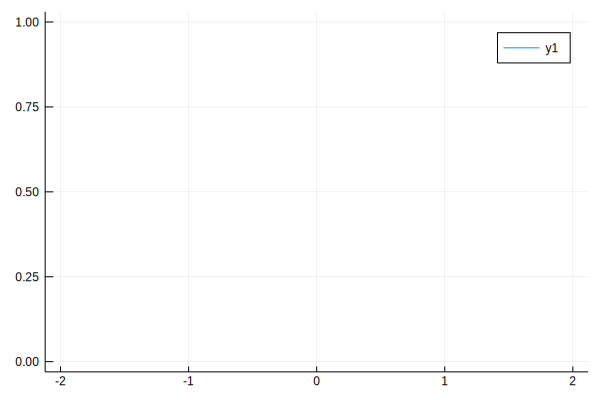

In [5]:
# If I begin to change the noise parameter then it suddenly picks up the positive stable stationary point and shows a 
# small spike at the unstable stationary point/saddle node where -0.100715

# Does it even make sense that the points are stabilising in the "negative" stable stationary point when that is the 
# "shallower" well so I think something is just wrong here with the normalisation

α=0.01

x_neg = collect(-2.0:0.01:-0.04)
x_pos = collect(0.01:0.01:2.0)
x = [x_neg; x_pos]
f1_both = f1_ssd.(x)
f1_both = f1_both./(0.01*sum(f1_both)) 
p1_both = plot(x,f1_both)